Name: Tran Thai Duc Hieu  
4-digit code: 8f95  
Email: t.tran@oth-aw.de  

# Used source
Used source is described in **used_source.ipynb**

# 4. Data quality check

## Walking data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

FILE_PATH = 'data_record/data_main.csv'

def loadData(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)    
    return data


In [2]:
walking_data = loadData(FILE_PATH)
walking_data[:, 0] = walking_data[:, 0] - walking_data[0, 0]

timestamp = walking_data[:,0]

# Calculate the time difference between each sample
d = timestamp[1:] - timestamp[:-1]
time_diff = pd.DataFrame(d, columns=['time_diff'])
time_diff.describe()

time_diff
count  6337.000000
mean     20.327915
std       3.439424
min      11.000000
25%      17.000000
50%      21.000000
75%      21.000000
max      37.000000

In [3]:
visualization_data = walking_data[:,:-2]
df_walking = pd.DataFrame(visualization_data, columns=['timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',])
df_walking['acc_magnitude'] = np.sqrt(df_walking['acc_x']**2 + df_walking['acc_y']**2 + df_walking['acc_z']**2)
df_walking['gyro_magnitude'] = np.sqrt(df_walking['gyro_x']**2 + df_walking['gyro_y']**2 + df_walking['gyro_z']**2)

df_walking.describe()


timestamp        acc_x        acc_y        acc_z       gyro_x  \
count    6338.000000  6338.000000  6338.000000  6338.000000  6338.000000   
mean    64090.530451    -0.897240    -0.331059     0.156278    12.430554   
std     37191.955581     0.303061     0.281922     0.231464    58.166377   
min         0.000000    -2.730000    -1.590000    -0.880000  -239.010000   
25%     31743.750000    -1.000000    -0.470000     0.020000   -23.912500   
50%     64404.000000    -0.910000    -0.300000     0.120000    10.500000   
75%     96073.000000    -0.730000    -0.190000     0.260000    40.410000   
max    128818.000000     0.000000     0.740000     1.080000   278.560000   

            gyro_y       gyro_z  acc_magnitude  gyro_magnitude  
count  6338.000000  6338.000000    6338.000000     6338.000000  
mean      1.883555     0.605374       1.035192       89.104456  
std      43.487530    69.554765       0.303843       48.269650  
min    -132.810000  -168.030000       0.190526        0.189737  
25%     -28.020000   -48.030000       0.897845       53.695871  
50%      -9.160000   -16.110000       0.987421       78.392634  
75%      28.690000    53.190000       1.160560      122.342459  
max     154.360000   179.440000       2.806528      288.468189

In [4]:
np.abs(df_walking['gyro_y'].to_numpy()).mean()

34.073415904070686

Unique sampling intervals:
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.
 29. 30. 31. 32. 33. 34. 35. 36. 37.]
Counts of unique sampling intervals:
 [   9   45   70   70  104  267 1083  300  322  626 1937  416  204  126
   96  380  114   38   27   28   26   29   11    1    2    5    1]
---------------------------------
Intervals values that appear more than 100 times:
 [15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 26. 27.]
Counts of most frequent sampling intervals:
 [ 104  267 1083  300  322  626 1937  416  204  126  380  114]


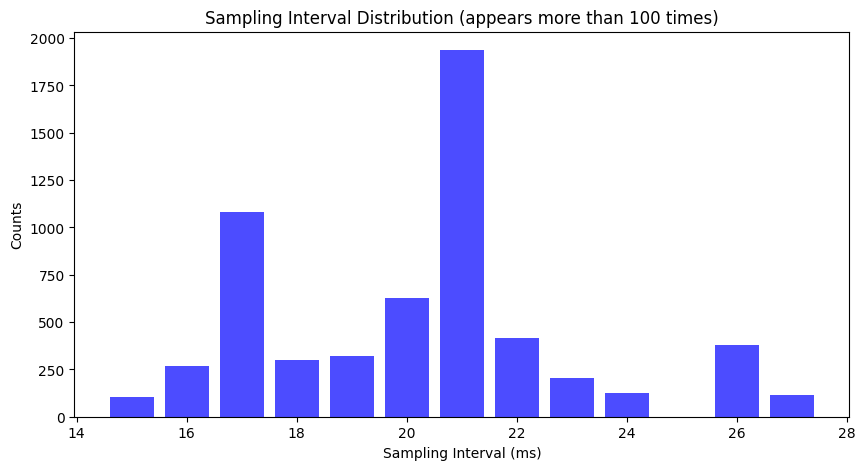

In [5]:
values, counts = np.unique(d, return_counts=True)
print('Unique sampling intervals:\n',values)
print('Counts of unique sampling intervals:\n',counts)
print('---------------------------------')

rate_significant = values[counts > 100]
counts_significant = counts[counts > 100]
print('Intervals values that appear more than 100 times:\n', rate_significant)    
print('Counts of most frequent sampling intervals:\n', counts_significant)

# Plot the sampling intervals   
plt.figure(figsize=(10,5))
plt.bar(rate_significant, counts_significant, color='blue', alpha=0.7)
plt.xlabel('Sampling Interval (ms)')
plt.ylabel('Counts')
plt.title('Sampling Interval Distribution (appears more than 100 times)')
plt.show()



In [6]:
most_frequent_interval_mean = np.mean(rate_significant)
print('Sampling rate (Hz) = 1 / sampling_interval(s)')
print(f'Sampling rate (Hz) = 1 / ({most_frequent_interval_mean} / 1000)')
print(f'Sampling rate (Hz) = {1000 / most_frequent_interval_mean:.2f} Hz')

Sampling rate (Hz) = 1 / sampling_interval(s)
Sampling rate (Hz) = 1 / (20.666666666666668 / 1000)
Sampling rate (Hz) = 48.39 Hz


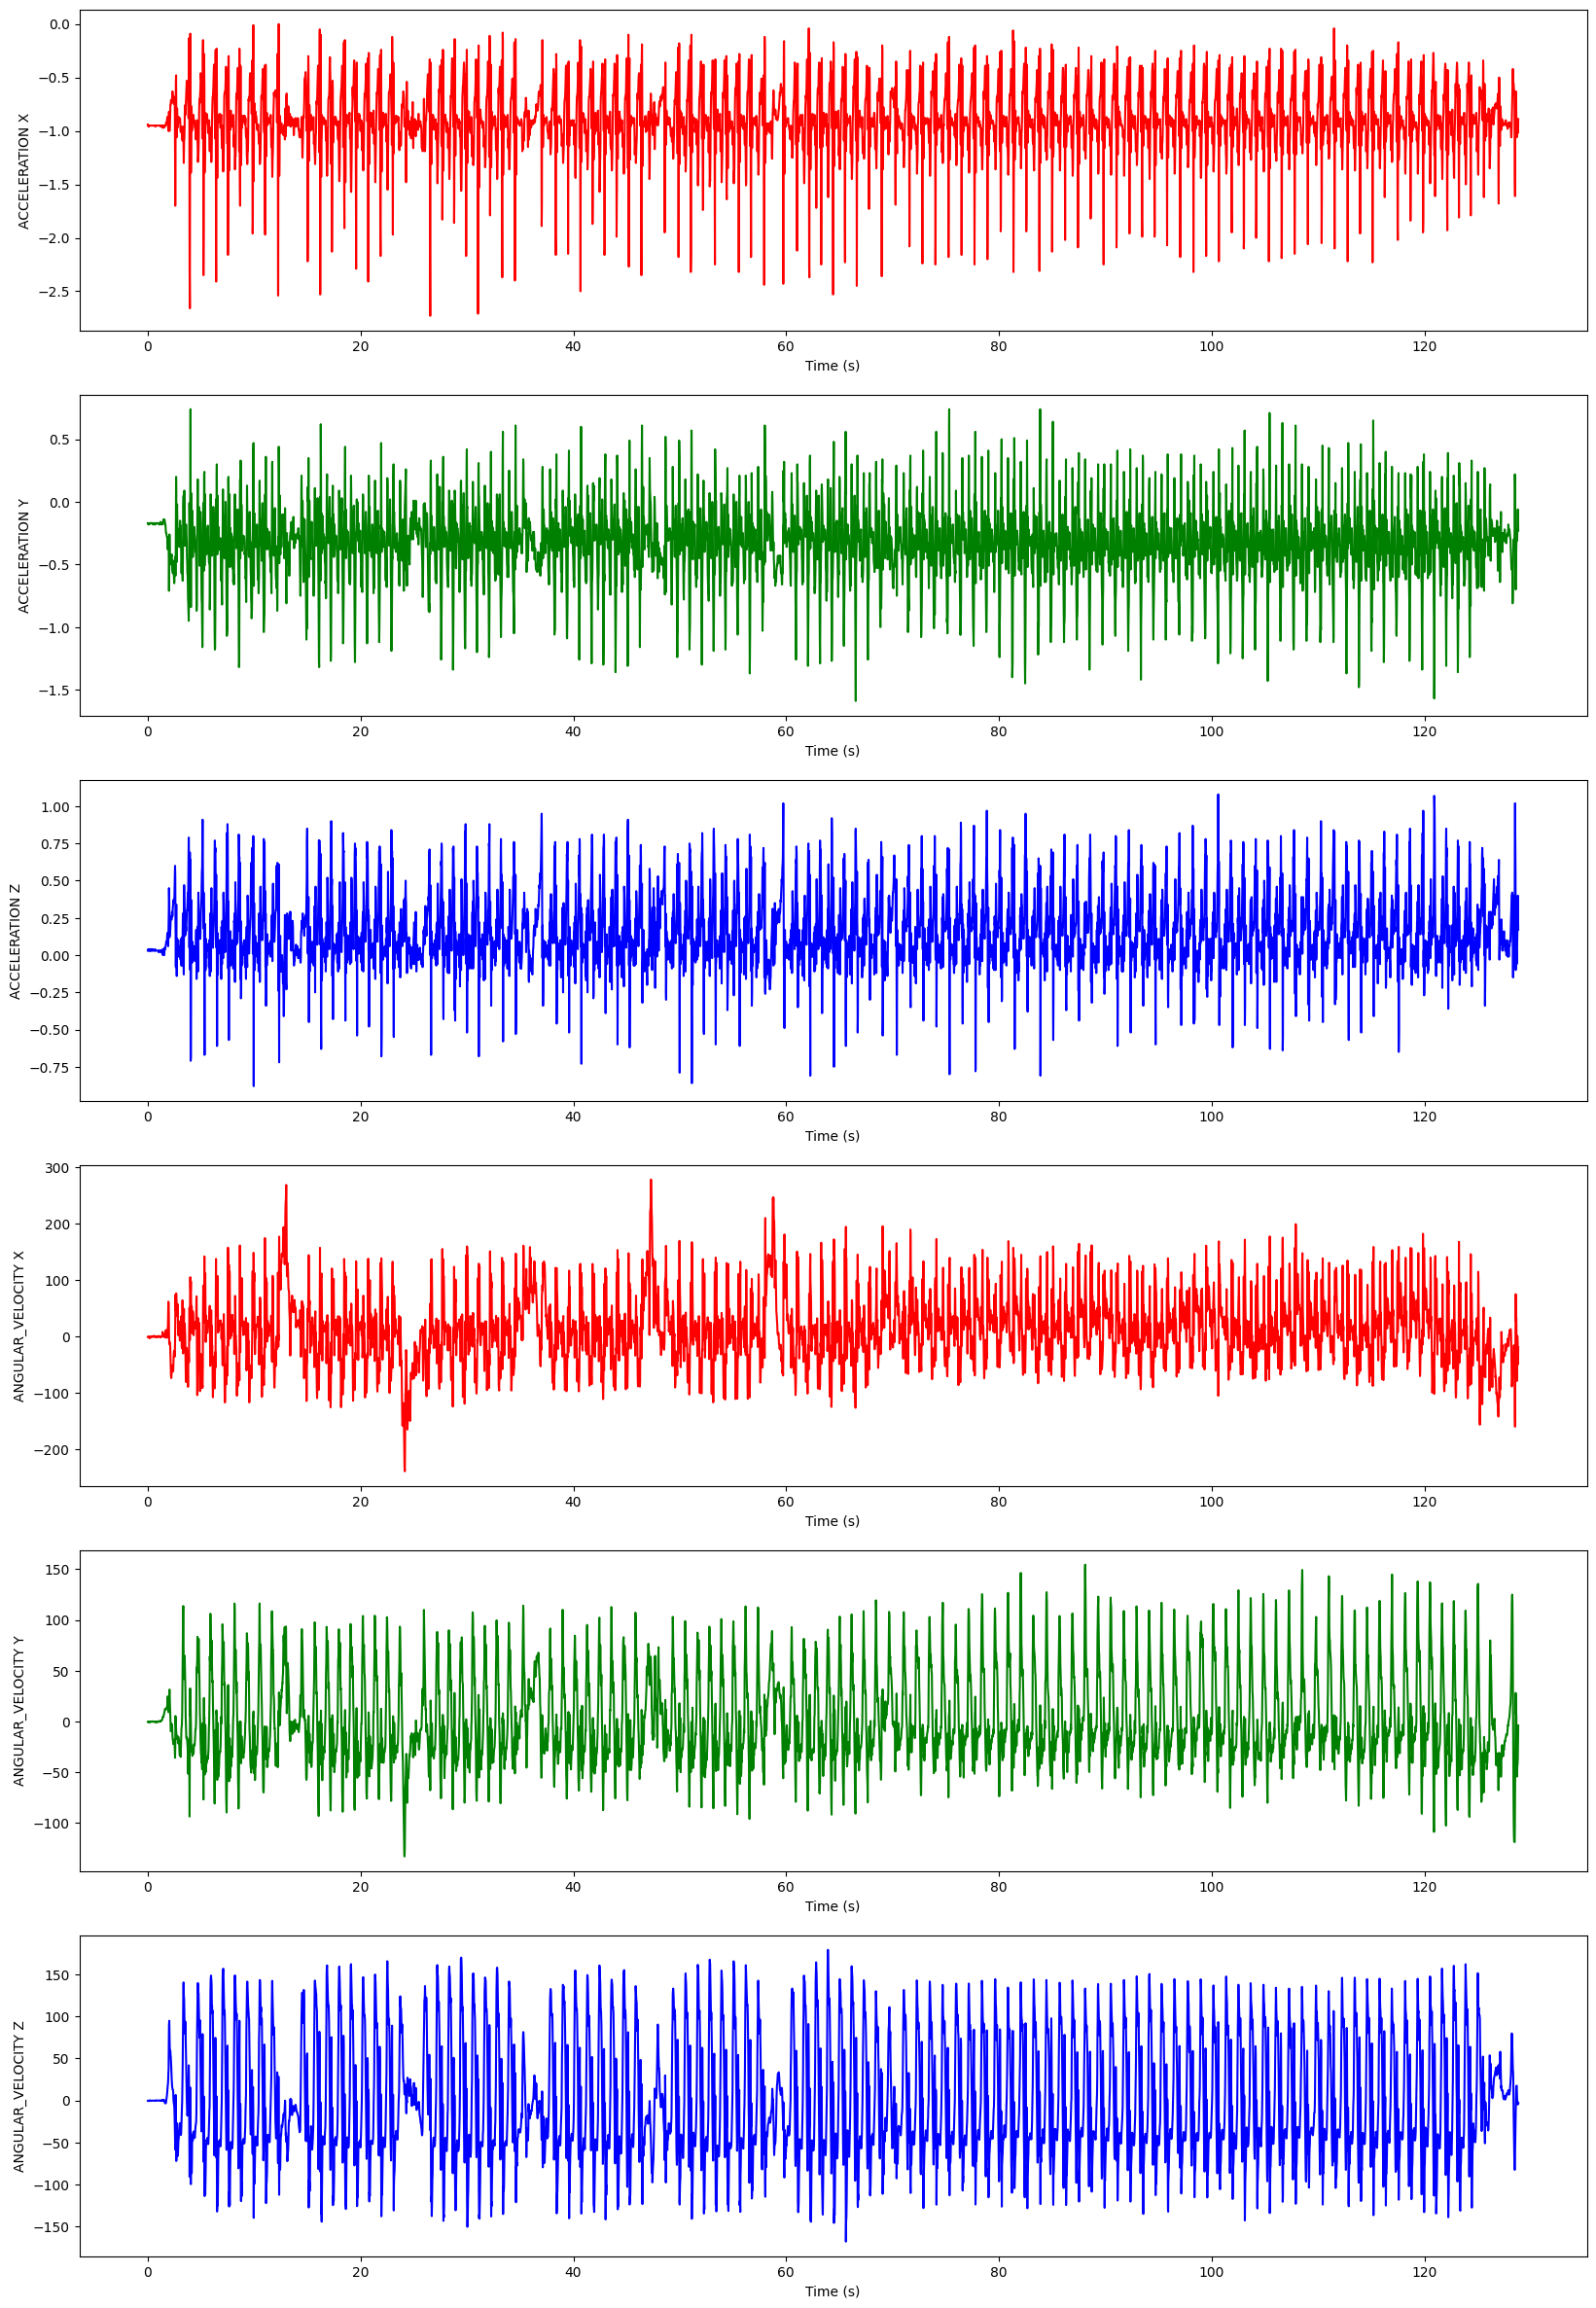

In [7]:
def plotData2(data):
    # Desciption: 
    # Plot all three axes of acceleration, angular velocity
    
    time = data[:, 0] / 1000  # Convert to seconds

    data_dict = {
        'acceleration': data[:, 1:4],
        'angular_velocity': data[:, 4:7],
    }

    plt.figure(figsize=(20, 30))

    row = 1
    for key in ['acceleration', 'angular_velocity']:
        for i, data_axis in enumerate(['x', 'y', 'z']):
            plt.subplot(6, 1, row)
            plt.plot(time, data_dict[key][:, i], color='r' if i == 0 else 'g' if i == 1 else 'b')
            plt.ylabel(key.upper() + ' ' + data_axis.upper())
            plt.xlabel('Time (s)')
            row = row + 1

    plt.show() 

plotData2(walking_data)

## Multiple actions data

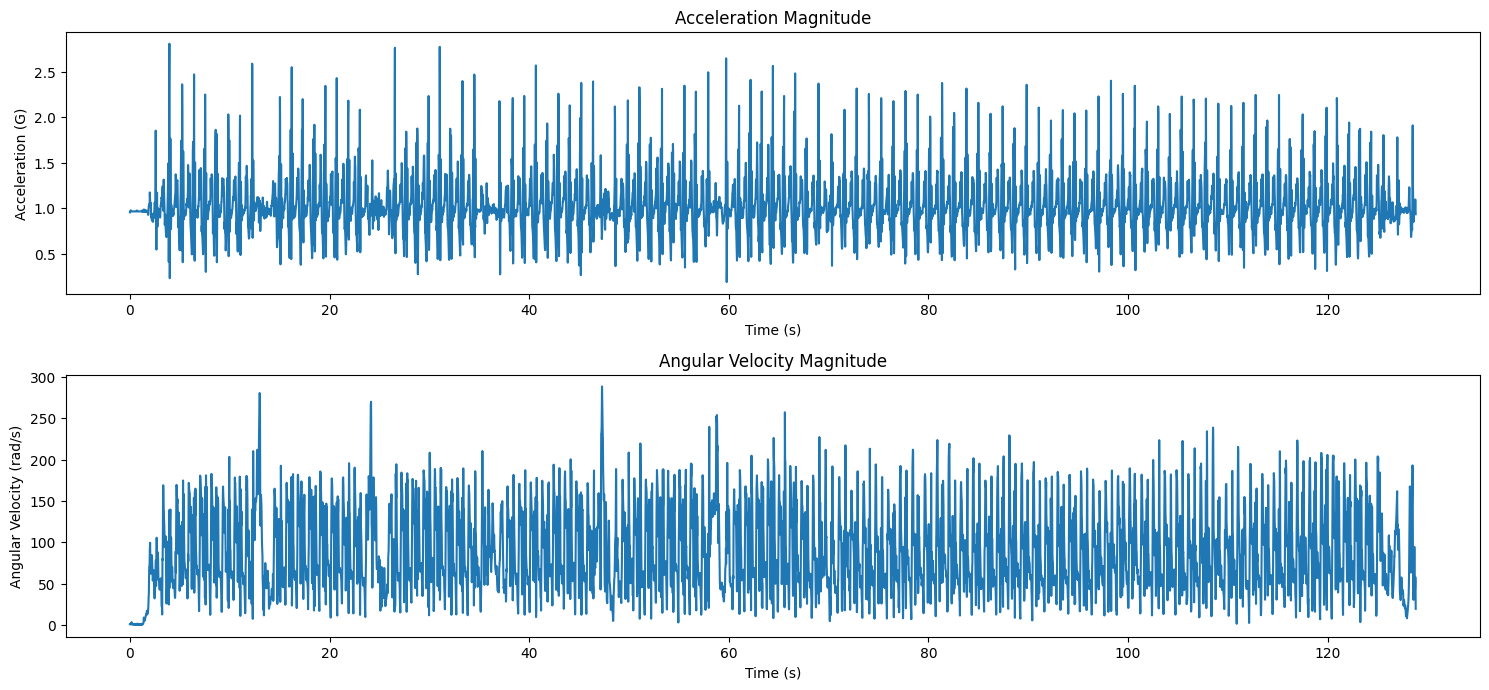

In [8]:
def plotData(data):
    # Desciption: 
    # Plot only the Magnitude of the data

    time = data[:, 0] / 1000  # Convert milliseconds to seconds
    acceleration = data[:, 1:4]  
    angular_velocity = data[:, 4:7]  

    a_abs = np.sqrt(acceleration[:, 0]**2 + acceleration[:, 1]**2 + acceleration[:, 2]**2)
    w_abs = np.sqrt(angular_velocity[:, 0]**2 + angular_velocity[:, 1]**2 + angular_velocity[:, 2]**2)

    # Plot the data
    plt.figure(figsize=(15, 10))

    # Plot acceleration
    plt.subplot(3, 1, 1)
    plt.plot(time, a_abs)
    plt.title('Acceleration Magnitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (G)')

    # Plot angular velocity
    plt.subplot(3, 1, 2)
    plt.plot(time, w_abs)
    plt.title('Angular Velocity Magnitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Angular Velocity (rad/s)')

    plt.tight_layout()
    plt.show()

plotData(walking_data)

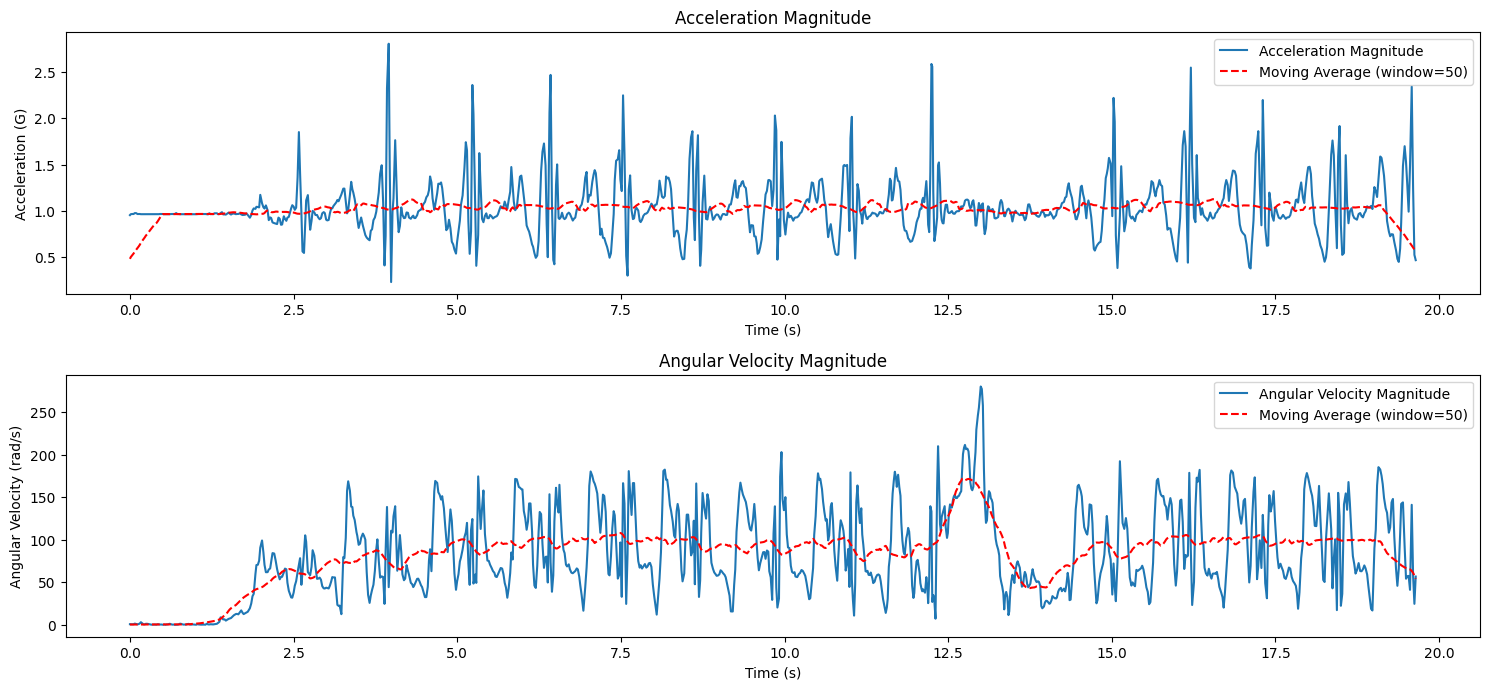

In [24]:
def plotDataMA(data, window_size=20):
    # Description:
    # Plot magnitude and its moving average for acceleration and angular velocity

    time = data[:, 0] / 1000  # Convert milliseconds to seconds
    acceleration = data[:, 1:4]
    angular_velocity = data[:, 4:7]

    # Calculate magnitude
    a_abs = np.sqrt(np.sum(acceleration**2, axis=1))
    w_abs = np.sqrt(np.sum(angular_velocity**2, axis=1))

    # Moving average
    def moving_average(x, w):
        return np.convolve(x, np.ones(w)/w, mode='same')

    a_avg = moving_average(a_abs, window_size)
    w_avg = moving_average(w_abs, window_size)

    # Plot
    plt.figure(figsize=(15, 10))

    # Acceleration
    plt.subplot(3, 1, 1)
    plt.plot(time, a_abs, label='Acceleration Magnitude')
    plt.plot(time, a_avg, 'r--', label=f'Moving Average (window={window_size})')
    plt.title('Acceleration Magnitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (G)')
    plt.legend()

    # Angular velocity
    plt.subplot(3, 1, 2)
    plt.plot(time, w_abs, label='Angular Velocity Magnitude')
    plt.plot(time, w_avg, 'r--', label=f'Moving Average (window={window_size})')
    plt.title('Angular Velocity Magnitude')
    plt.xlabel('Time (s)')
    plt.ylabel('Angular Velocity (rad/s)')
    plt.legend()

    plt.tight_layout()
    plt.show()

plotDataMA(walking_data[:1000], window_size=50)

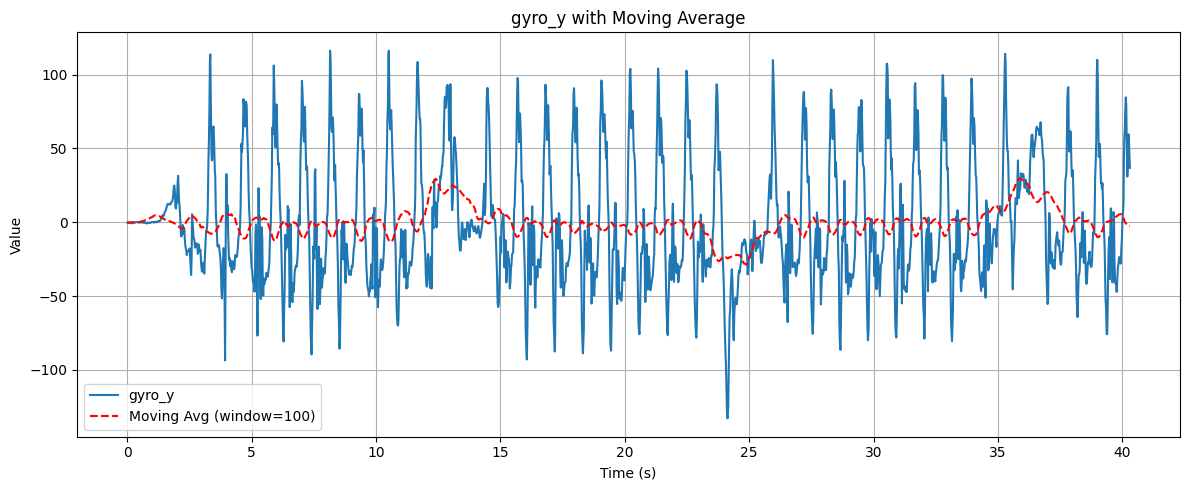

In [33]:
def plotOneMA(data, column_name='accel_x', window_size=20):
    # Mapping from column name to index
    col_index_map = {
        'accel_x': 1,
        'accel_y': 2,
        'accel_z': 3,
        'gyro_x': 4,
        'gyro_y': 5,
        'gyro_z': 6
    }

    if column_name not in col_index_map:
        raise ValueError("Invalid column name. Must be one of: 'accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z'.")

    # Get time and selected signal
    time = data[:, 0] / 1000  # milliseconds to seconds
    col_data = data[:, col_index_map[column_name]]

    # Compute moving average
    def moving_average(x, w):
        return np.convolve(x, np.ones(w)/w, mode='same')

    col_avg = moving_average(col_data, window_size)

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(time, col_data, label=column_name)
    plt.plot(time, col_avg, 'r--', label=f'Moving Avg (window={window_size})')
    plt.title(f'{column_name} with Moving Average')
    plt.xlabel('Time (s)')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plotOneMA(walking_data[:2000], column_name='gyro_y', window_size=100)

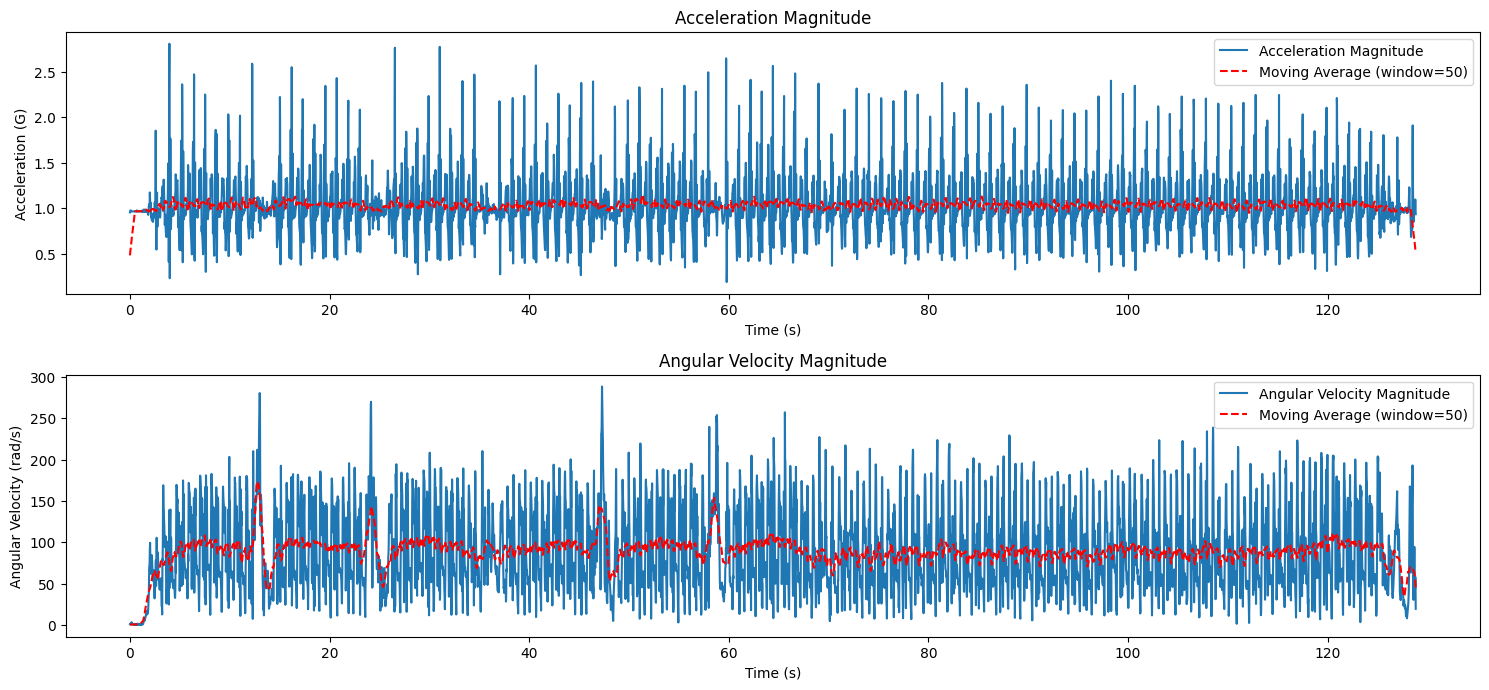

In [28]:
plotDataMA(walking_data, window_size=50)

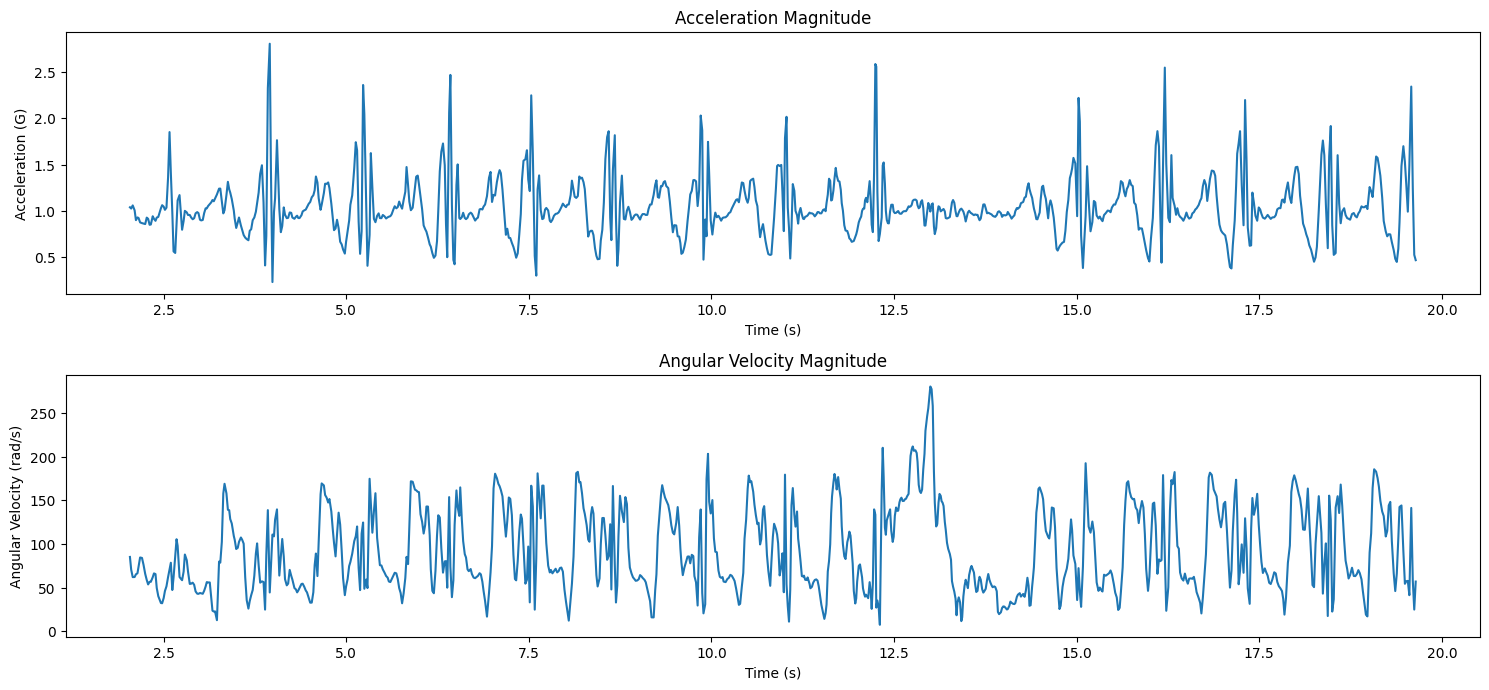

In [ ]:
plotData(walking_data[0:1000])

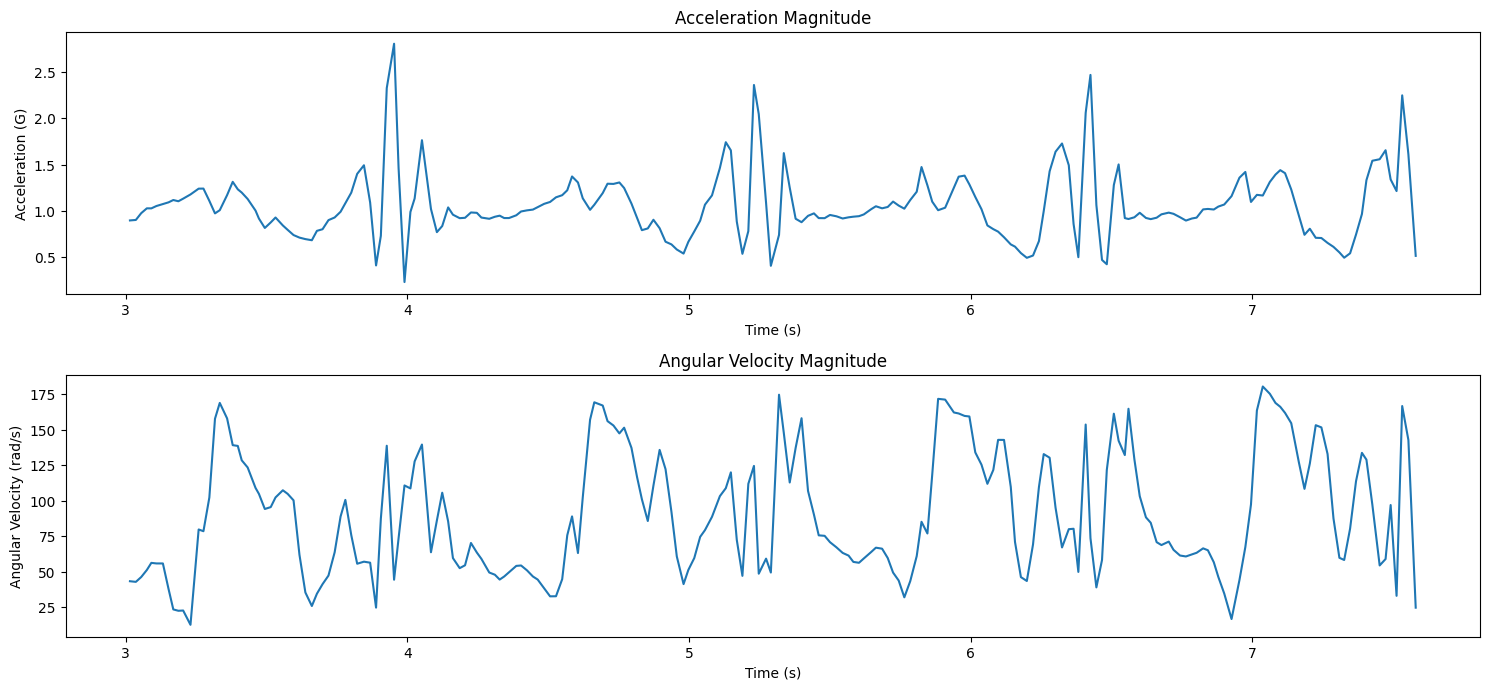

In [10]:
zoom_in = walking_data[walking_data[:, 0] > 3000]
zoom_in = zoom_in[zoom_in[:, 0] < 7600]
plotData(zoom_in)

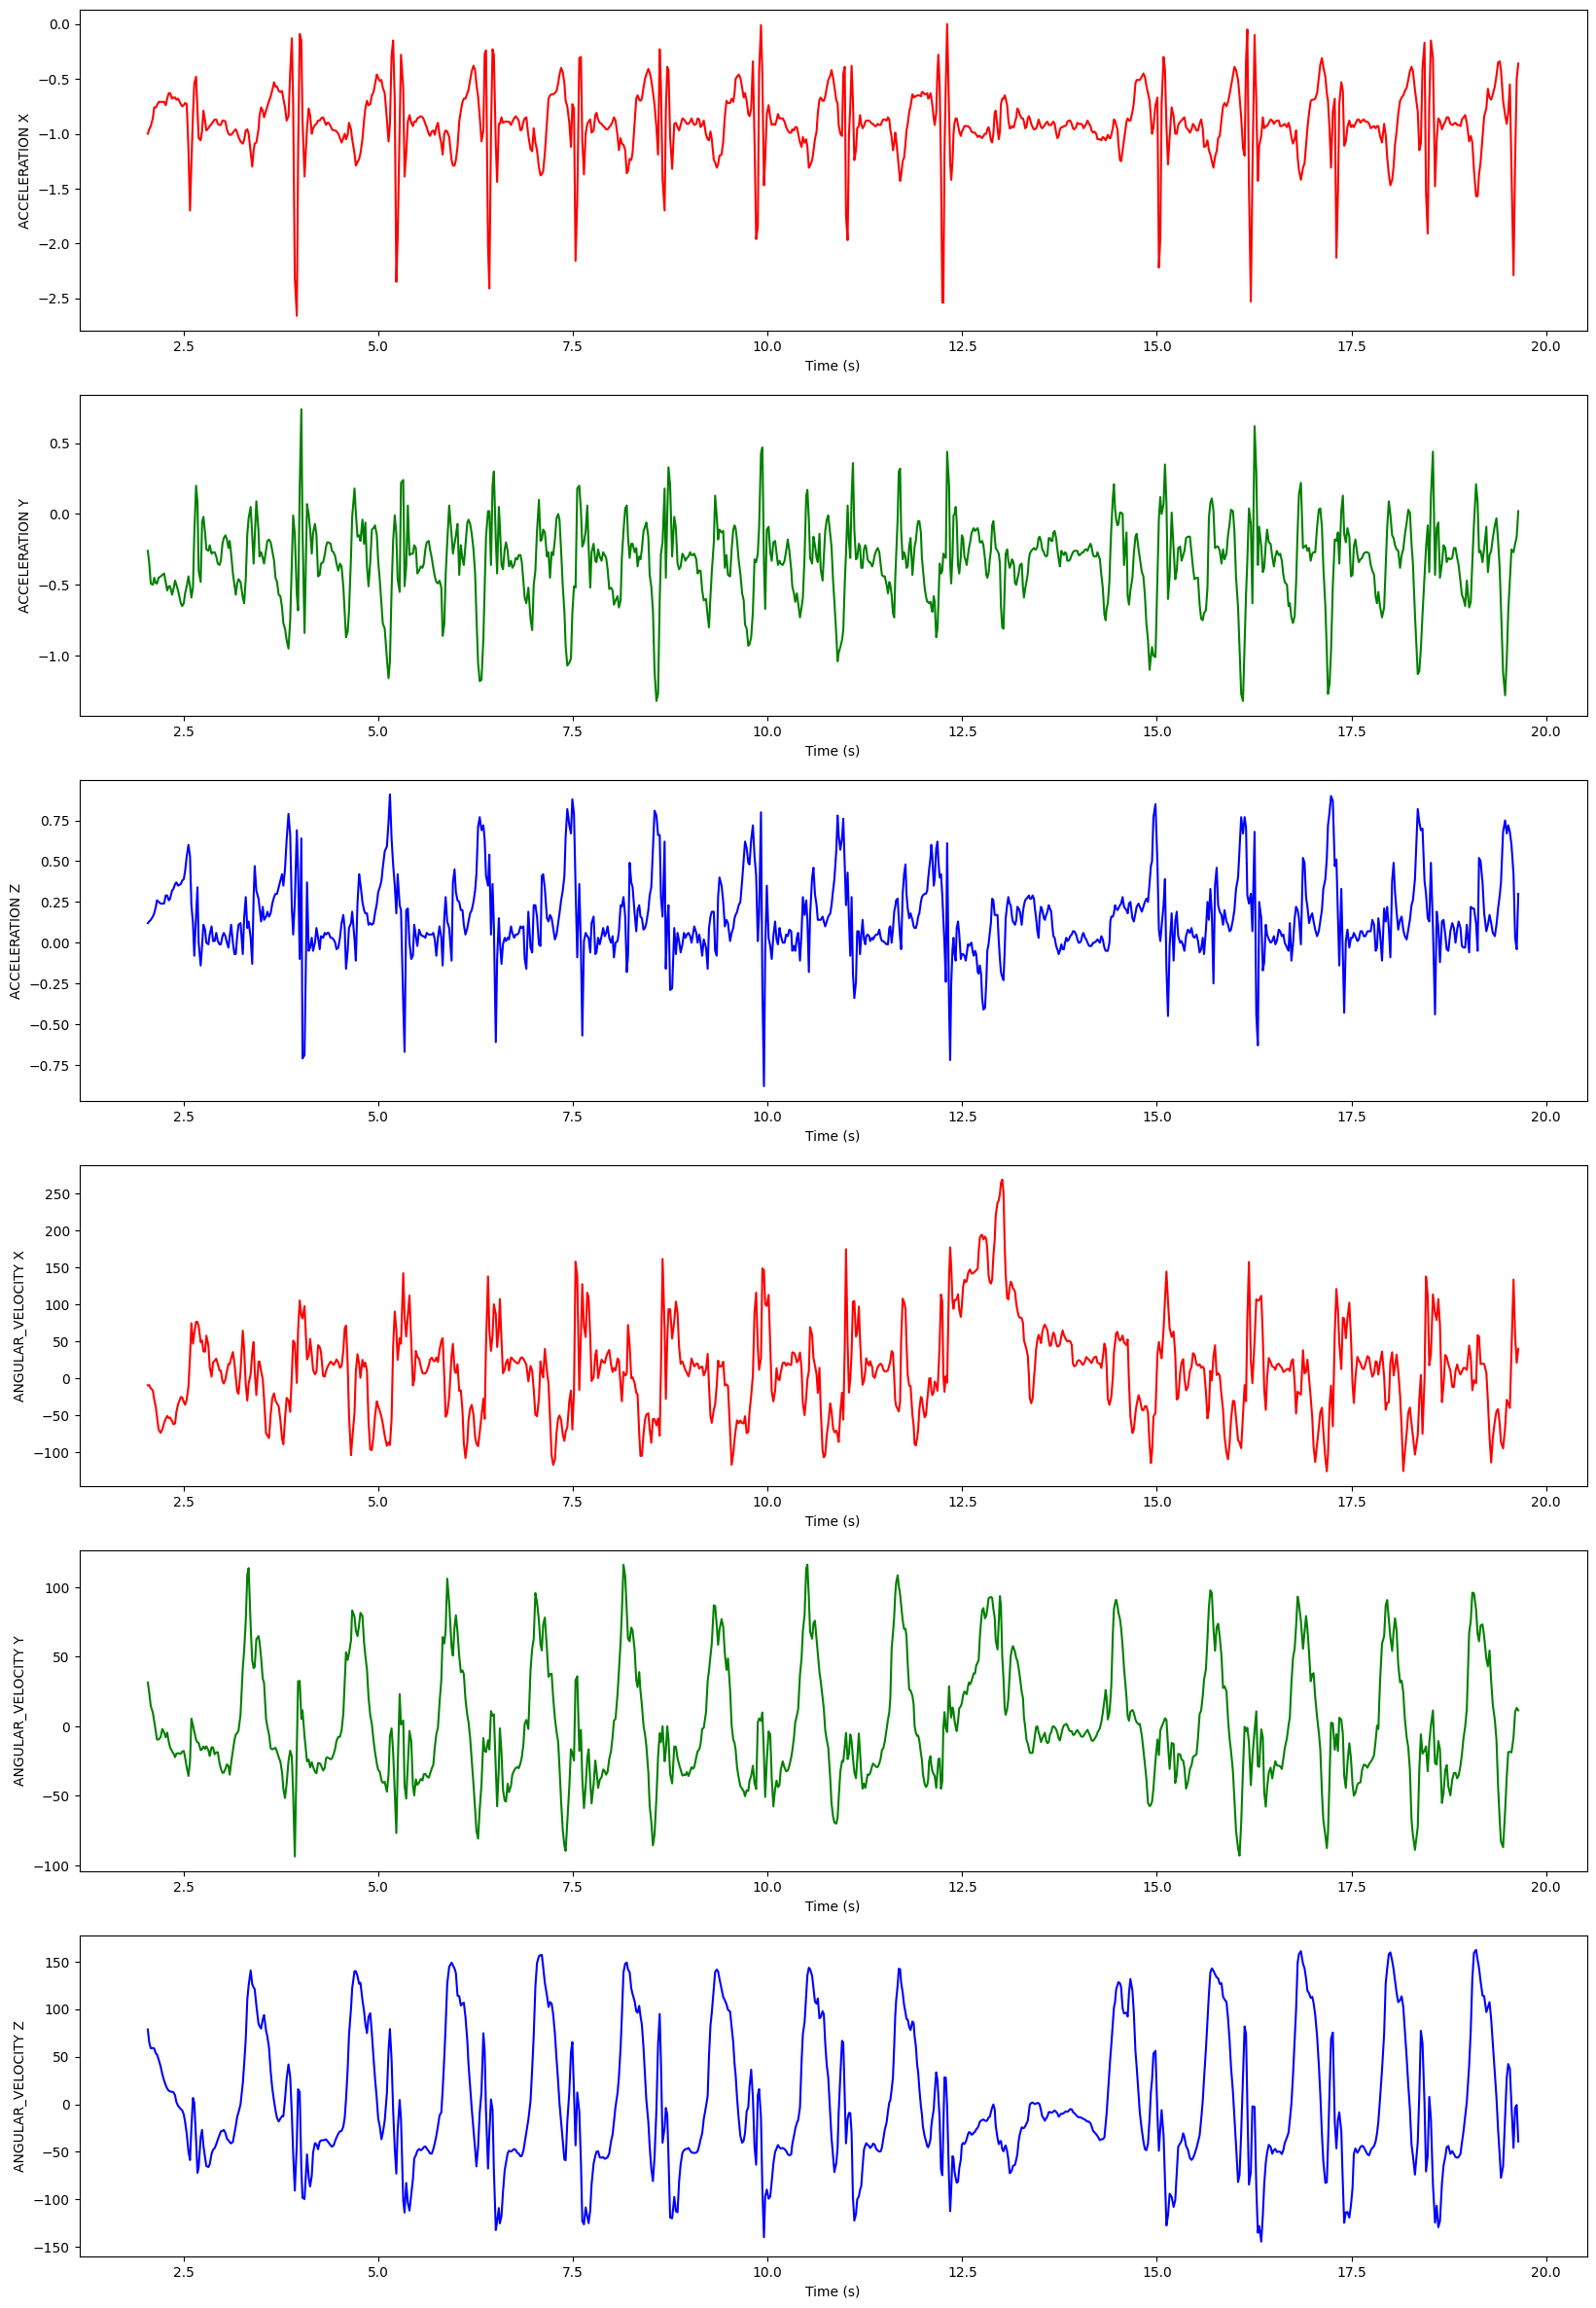

In [11]:
plotData2(walking_data[100:1000])

# 5. Data analysis

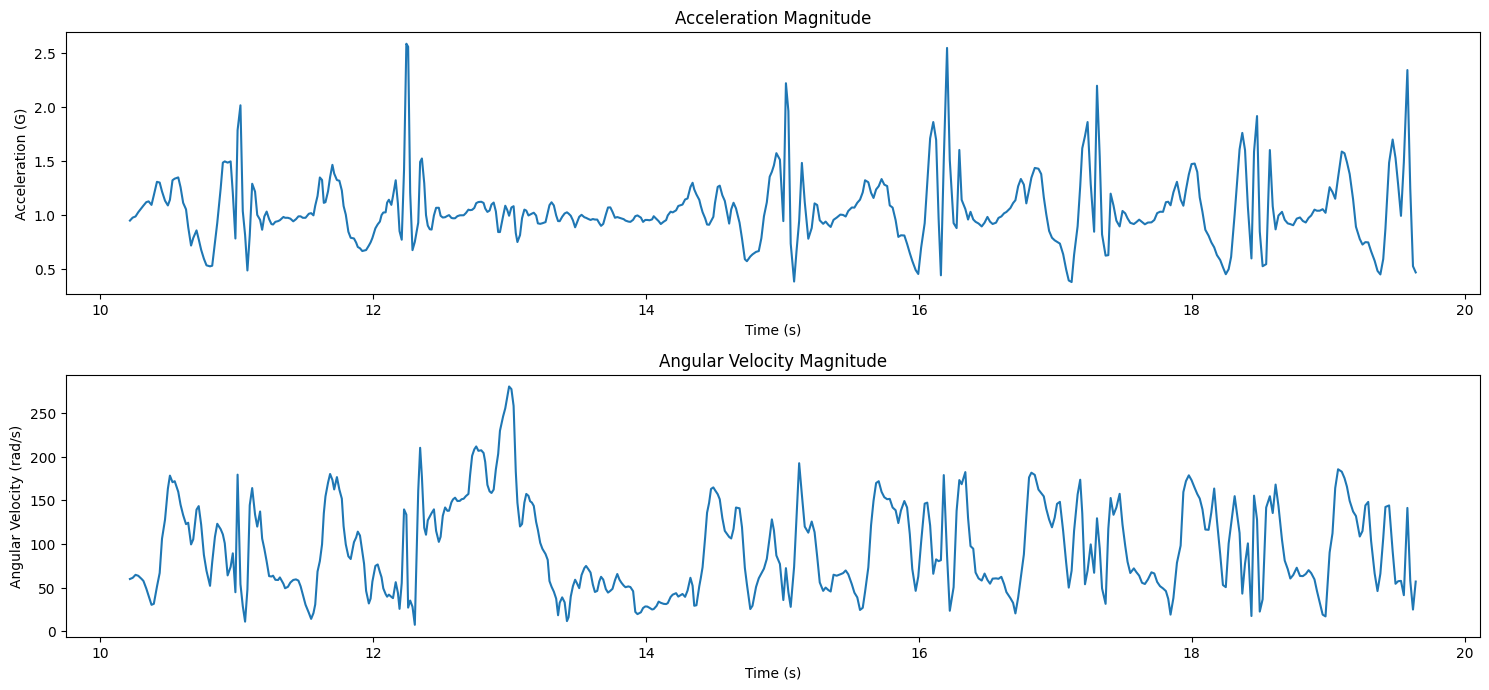

In [12]:
plotData(walking_data[500:1000])

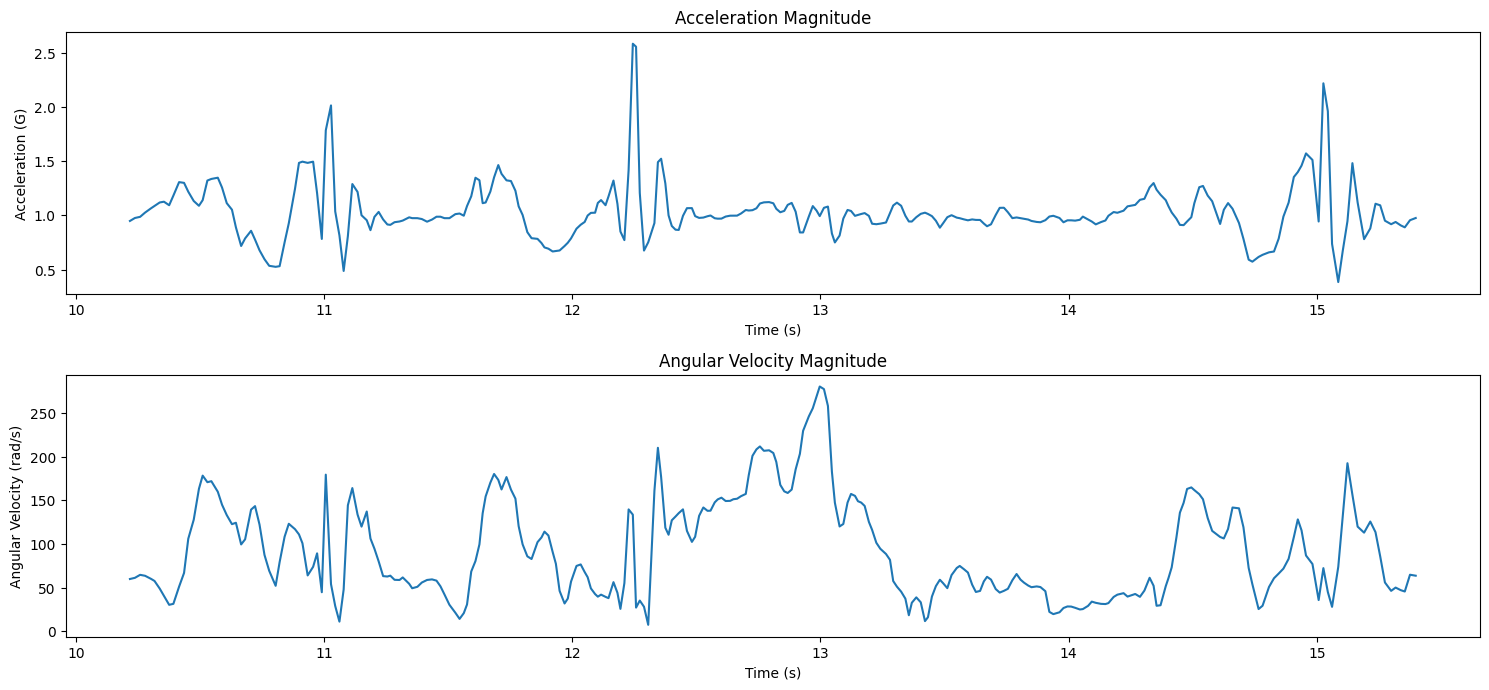

In [13]:
plotData(walking_data[500:800])

# 6. Detection algorithms

## Threshold detection method

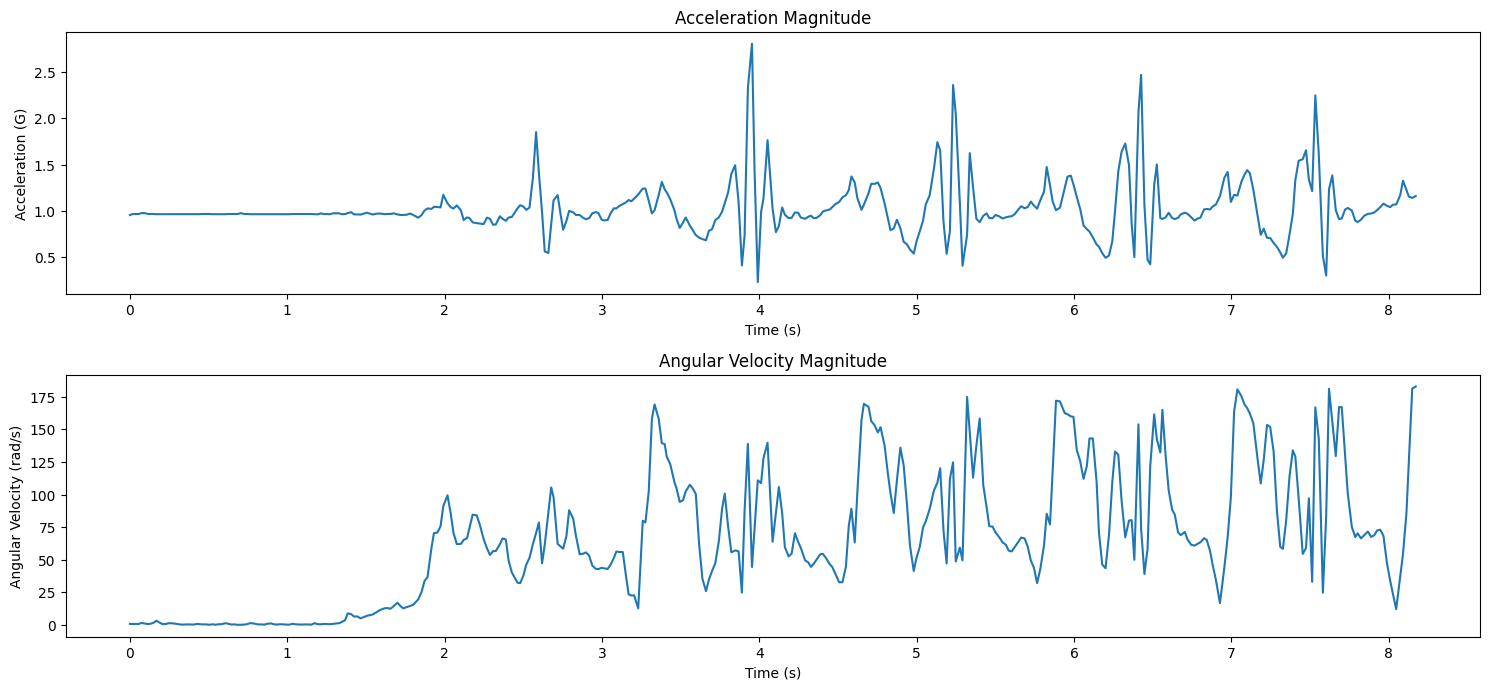

In [14]:
plotData(walking_data[:400])

## Turning detection

Total steps detected: 214


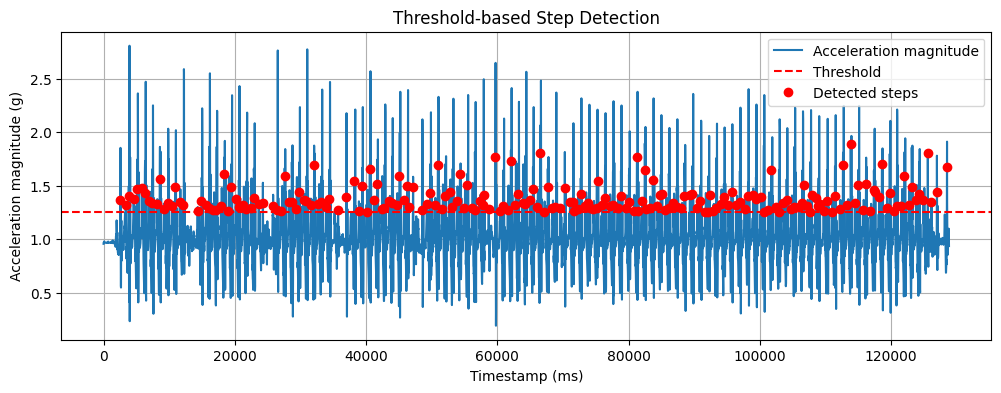

In [15]:
df_walking = pd.DataFrame(walking_data[:,:-2], columns=['timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
df_walking['acc_magnitude'] = np.sqrt(df_walking['acc_x']**2 + df_walking['acc_y']**2 + df_walking['acc_z']**2)
df_walking['gyro_magnitude'] = np.sqrt(df_walking['gyro_x']**2 + df_walking['gyro_y']**2 + df_walking['gyro_z']**2)

UPPER_THRESHOLD = 1.25        
STEP_DELAY_MS = 250     
last_step_time = -np.inf
step_count = 0
step_indices = []

for i in range(len(df_walking)):
    a = df_walking['acc_magnitude'].iloc[i]
    t = df_walking['timestamp'].iloc[i]

    if a > UPPER_THRESHOLD and (t - last_step_time) > STEP_DELAY_MS:
        step_count += 1
        last_step_time = t
        step_indices.append(i)

print(f'Total steps detected: {step_count}')

plt.figure(figsize=(12, 4))
plt.plot(df_walking['timestamp'], df_walking['acc_magnitude'], label='Acceleration magnitude')
plt.axhline(y=UPPER_THRESHOLD, color='r', linestyle='--', label='Threshold')

plt.plot(df_walking['timestamp'].iloc[step_indices], df_walking['acc_magnitude'].iloc[step_indices],
         'ro', label='Detected steps')

plt.xlabel("Timestamp (ms)")
plt.ylabel("Acceleration magnitude (g)")
plt.legend()
plt.title("Threshold-based Step Detection")
plt.grid(True)
plt.show()

## Peaks detection method

Number of steps detected: 27


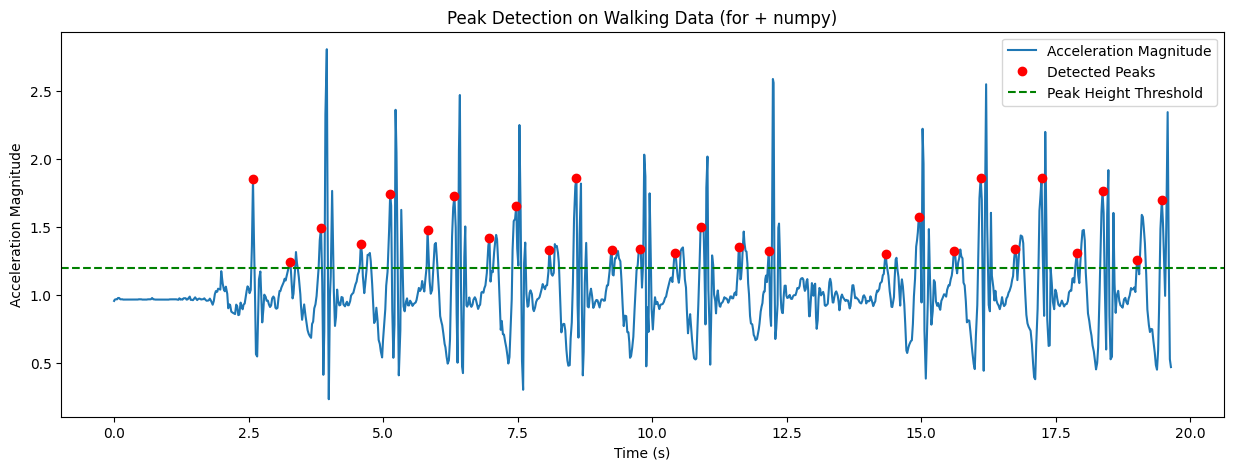

In [16]:
PEAK_HEIGHT = 1.2  
PEAK_DISTANCE = 14

peaks = []
last_peak_idx = -PEAK_DISTANCE

visualization_data = walking_data[:1000,:-2]
df_walking = pd.DataFrame(visualization_data, columns=['timestamp', 'acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z',])
df_walking['acc_magnitude'] = np.sqrt(df_walking['acc_x']**2 + df_walking['acc_y']**2 + df_walking['acc_z']**2)
df_walking['gyro_magnitude'] = np.sqrt(df_walking['gyro_x']**2 + df_walking['gyro_y']**2 + df_walking['gyro_z']**2)


acc_magnitude = df_walking['acc_magnitude']

for i in range(1, len(acc_magnitude) - 1):
    if (
        acc_magnitude[i] > PEAK_HEIGHT and
        acc_magnitude[i] > acc_magnitude[i - 1] and
        acc_magnitude[i] > acc_magnitude[i + 1] and
        (i - last_peak_idx) >= PEAK_DISTANCE
    ):
        peaks.append(i)
        last_peak_idx = i

print(f"Number of steps detected: {len(peaks)}")

plt.figure(figsize=(15, 5))
plt.plot(visualization_data[:,0] / 1000, acc_magnitude, label='Acceleration Magnitude')
plt.plot(visualization_data[peaks, 0] / 1000, acc_magnitude[peaks], 'ro', label='Detected Peaks')
plt.axhline(PEAK_HEIGHT, color='g', linestyle='--', label='Peak Height Threshold')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration Magnitude')
plt.title('Peak Detection on Walking Data (for + numpy)')
plt.legend()
plt.show()

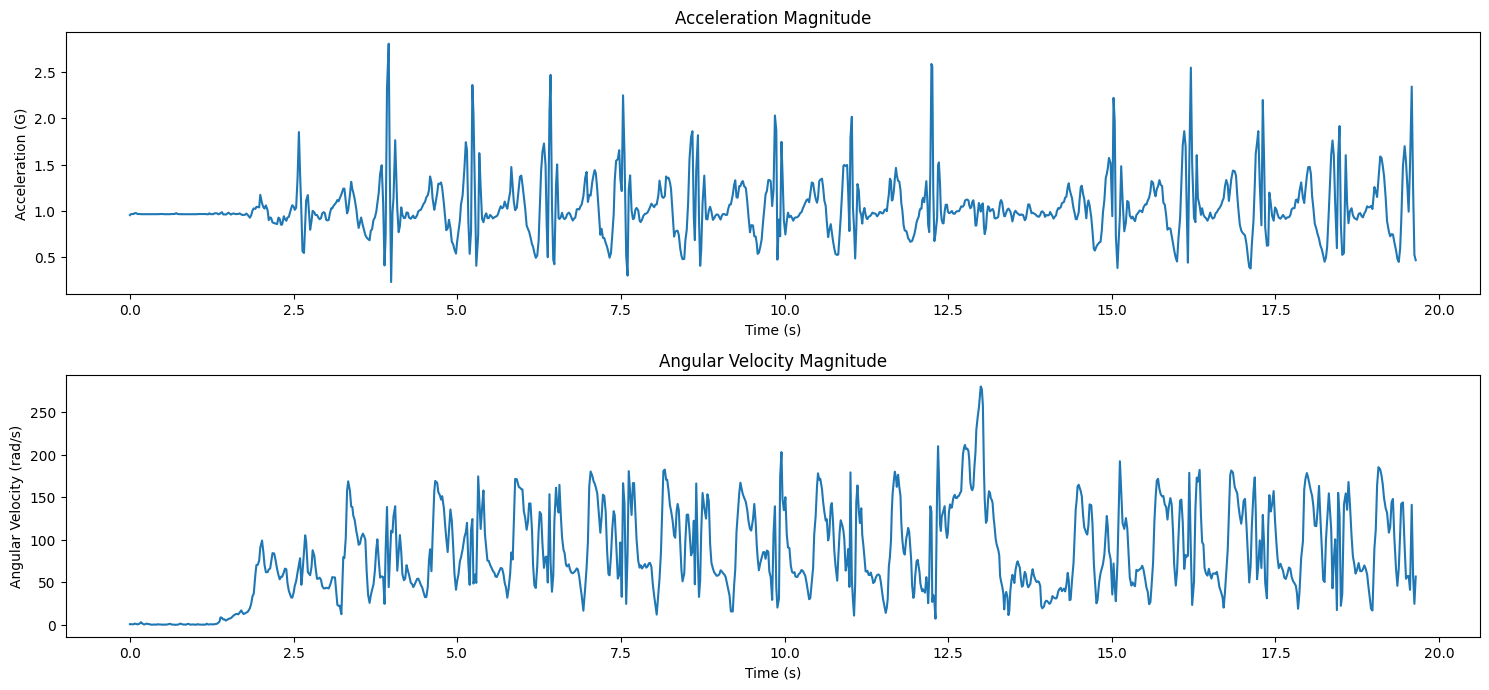

In [17]:
plotData(walking_data[:1000])

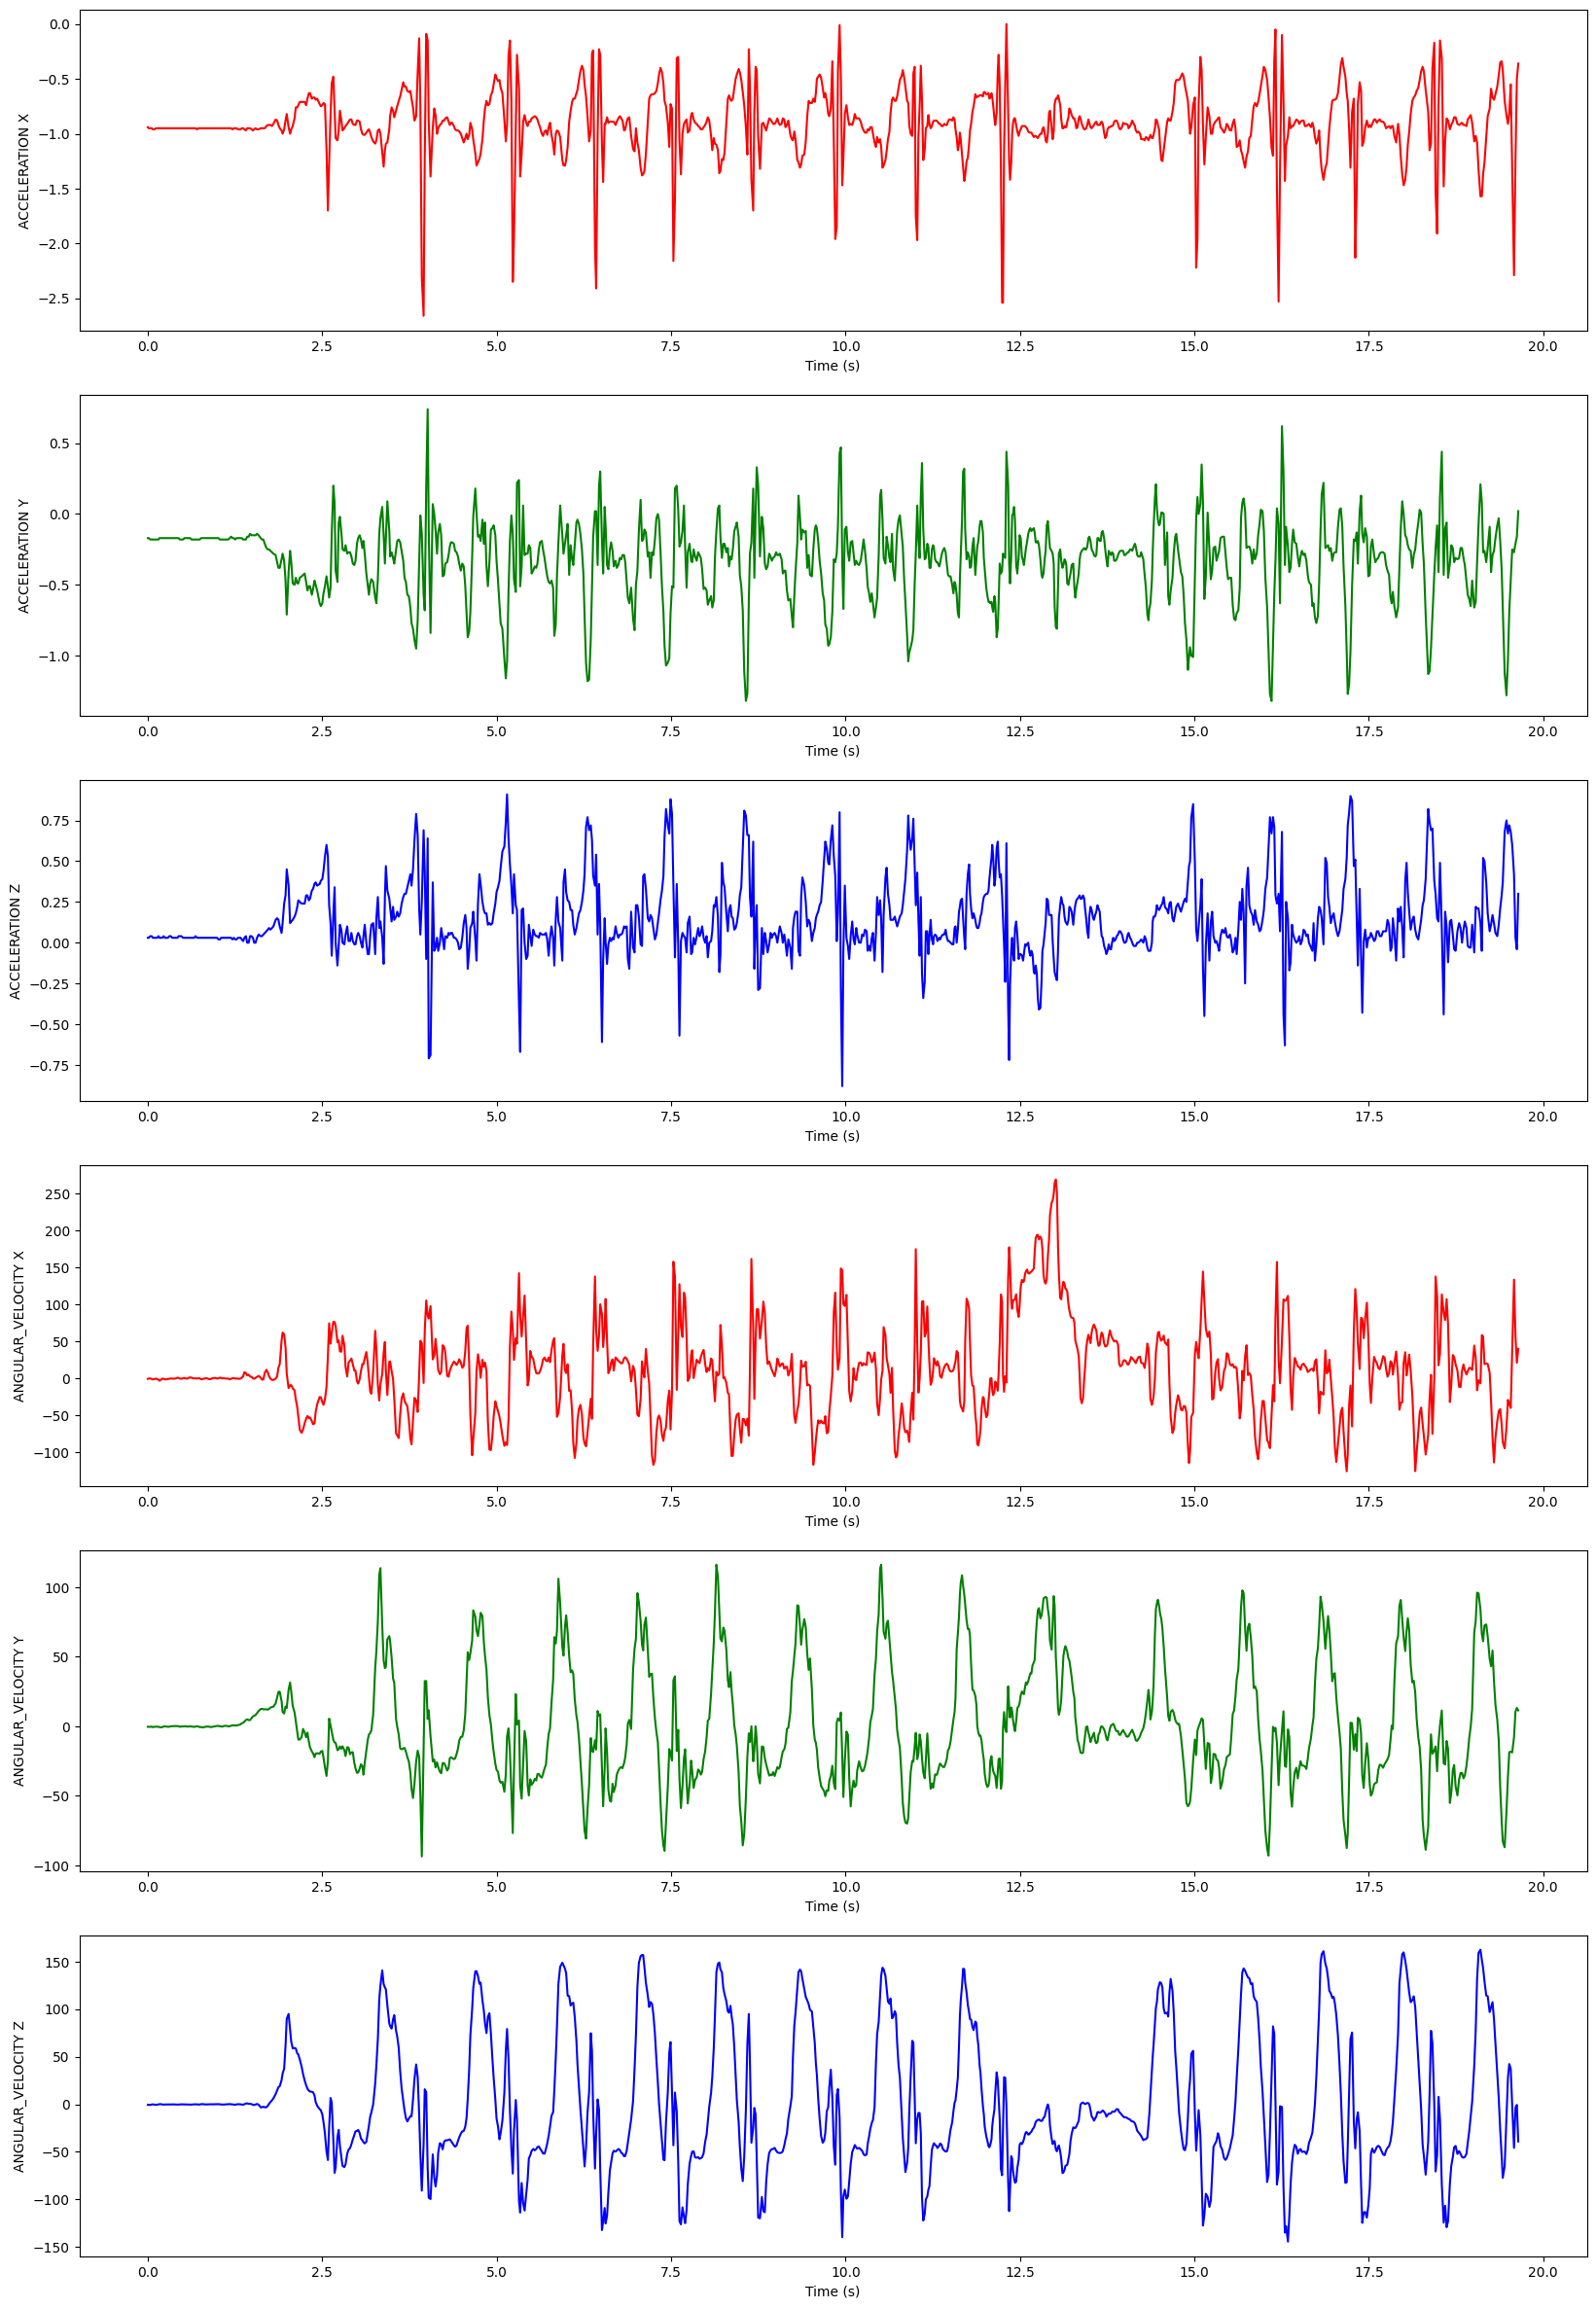

In [18]:
plotData2(walking_data[:1000])

27 26


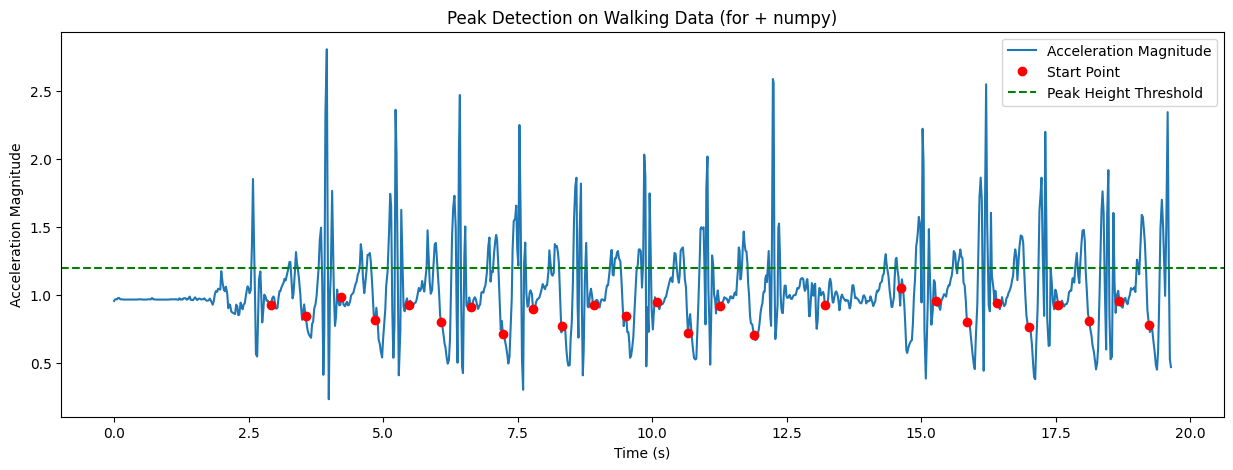

In [19]:
peaks = np.array(peaks)
start_points = (peaks[:-1] + peaks[1:]) // 2  

print(len(peaks), len(start_points))

plt.figure(figsize=(15, 5))
plt.plot(visualization_data[:,0] / 1000, acc_magnitude, label='Acceleration Magnitude')
plt.plot(visualization_data[start_points, 0] / 1000, acc_magnitude[start_points], 'ro', label='Start Point')
plt.axhline(PEAK_HEIGHT, color='g', linestyle='--', label='Peak Height Threshold')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration Magnitude')
plt.title('Peak Detection on Walking Data (for + numpy)')
plt.legend()
plt.show()